In [ ]:
# 1. 미세먼지(dust.xlsx)의 결측치를 이전 데이터로 채웠는데, 이전 시간이 아닌 다음 시간 값으로 채우고 결측치를 처리하세요.
## fillna(method='bfill') 또는 fillna(method='backfill') 사용

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dust = pd.read_excel("../resources/8장/dust.xlsx")
dust.fillna(method="bfill", inplace=True)

dust.rename(
    columns={
        "날짜": "date",
        "아황산가스": "so2",
        "일산화탄소": "co",
        "오존": "o3",
        "이산화질소": "no2",
    },
    inplace=True,
)
dust["date"] = dust["date"].str[:11]
dust["date"] = pd.to_datetime(dust["date"])
dust["year"] = dust["date"].dt.year
dust["month"] = dust["date"].dt.month
dust["day"] = dust["date"].dt.day
dust = dust[["date", "year", "month", "day", "so2", "co", "o3", "no2", "PM10", "PM2.5"]]
dust.isnull().sum()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22540\2068405984.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust.fillna(method="bfill", inplace=True)


,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,20.0,14.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22540\3664773483.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 50)` for the same effect.

  sns.barplot(data=dust, x="day", y="o3", ci=50, palette="husl")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22540\3664773483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dust, x="day", y="o3", ci=50, palette="husl")


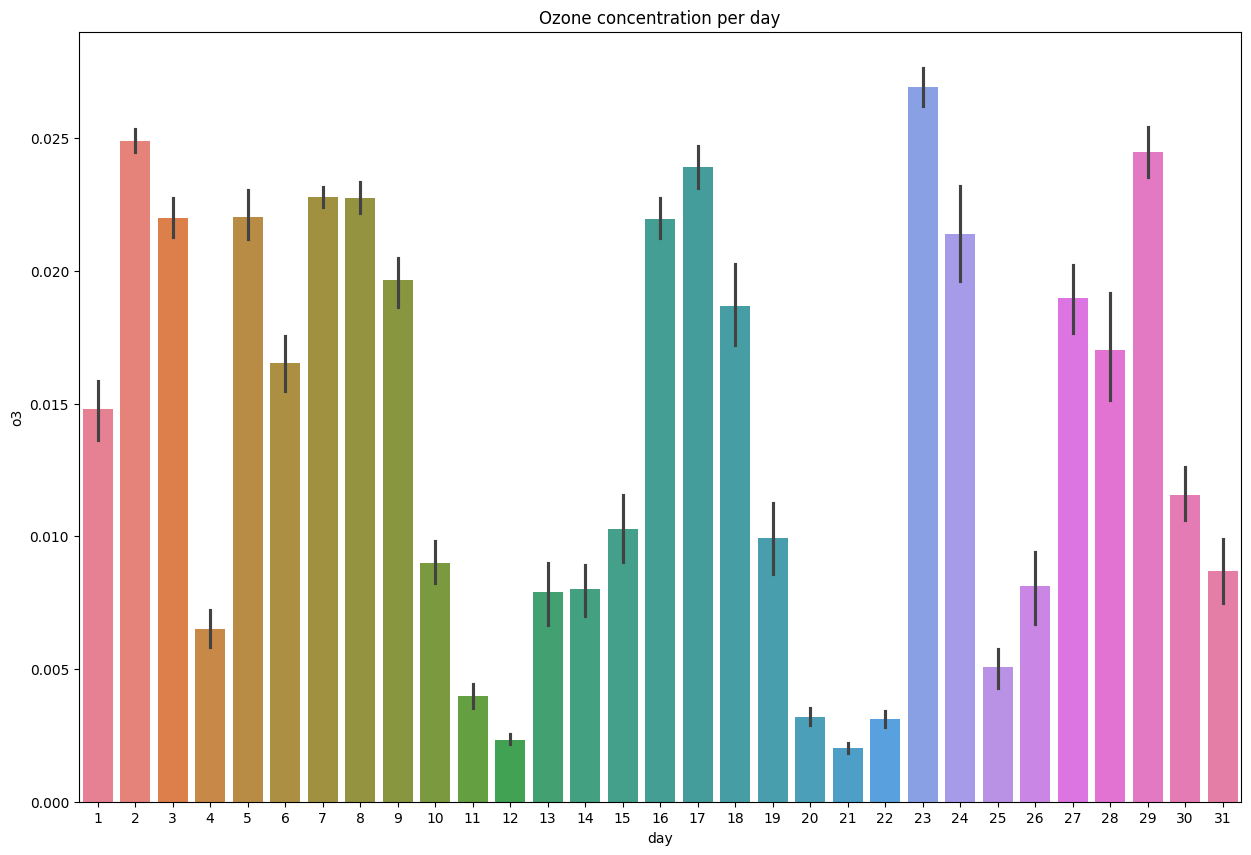

In [59]:
# 2. 데이터프레임(df)의 일별 오존(o3) 농도를 시본 모듈을 사용하여 막대 그래프로 나타내고, 그래프의 옵션들을 다양하게 설정하세요.

plt.figure(figsize=(15, 10))
sns.barplot(data=dust, x="day", y="o3", ci=50, palette="husl")
plt.title("Ozone concentration per day")
plt.xticks(rotation=0)
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22540\4181054761.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="day", y="temp", color="g", ci=None)


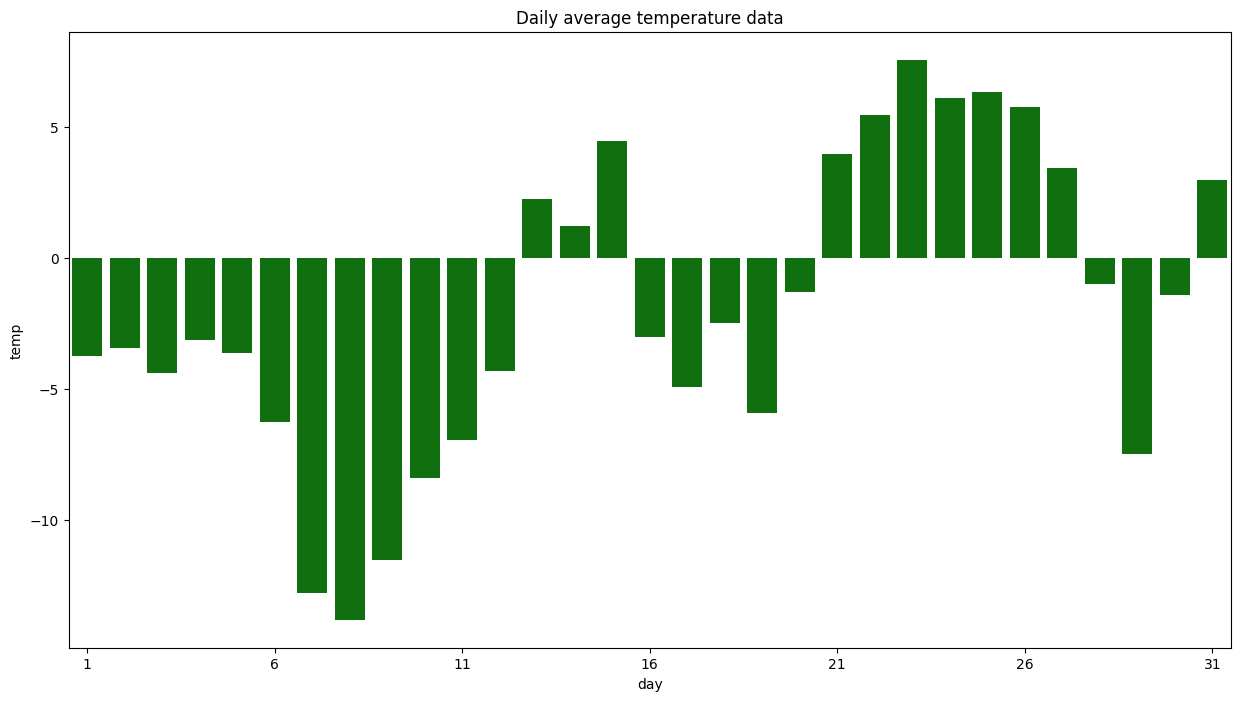

In [211]:
# 3. 본문에서 사용된 데이터를 가지고 일별 평균 기온(temp) 데이터를 세로 막대 그래프로 나타내세요.

weather = pd.read_excel("../resources/8장/weather.xlsx")
weather.drop(labels="지점", axis=1, inplace=True)
weather.drop(labels="지점명", axis=1, inplace=True)
weather.columns = ["date", "temp", "wind", "rain", "humid"]
weather["date"] = pd.to_datetime(weather["date"]).dt.date
weather["date"] = weather["date"].astype("datetime64[ns]")
weather["rain"] = weather["rain"].replace([0], 0.01)
df = pd.merge(dust, weather, on="date")

plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="day", y="temp", color="g", ci=None)

plt.xticks(ticks=range(0, 31, 5))

plt.title("Daily average temperature data")
plt.show()